### Word Cloud Formation

In [1]:
# Import packages/libraries
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import collections
import pandas as pd
import nltk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import string

# Bring in df
df = pd.read_excel("C://Users/cluel/Documents/GitHub/Harry-Potter-Text-Mining/Output/df.xlsx")

# Bring in string punctuation

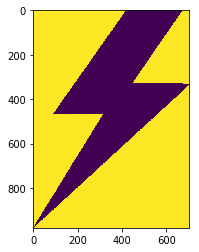

In [2]:
# Delete "photo" object (to debug mask)
#del(photo)

# Bring in mask data
photo = Image.open("C://Users/cluel/Documents/GitHub/Harry-Potter-Text-Mining/Images/Thunderbolt.jpg")
mask = np.array(photo)

plt.imshow(photo)

Prepare format of words for word cloud

In [3]:
# Lists in df currently strings - remove double quotes
df['WordCloudText']=df['WordCloudText'].apply(lambda x: x.strip('][').split(', '))

In [4]:
# Create Dictionary and list
wordcount={}
list = []

# Get Words Ready
for x in df.WordCloudText:
    list.extend(x)

In [5]:
# Clean text
textcount=str(list).split()
textcount=[''.join(c for c in s if c not in string.punctuation) for s in textcount] #Remove punctuation

# Wordcount Loop
# If the word is not in the stop words, it's added to the dictionary with a count.
# If the word already exists in the dictionary, the count is made one higher.

for word in textcount:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

# Clean messy words out of dictionary - FOR HP ONLY
#del wordcount['¨c']
#del wordcount['—']
#del wordcount['ter']
    
# Printing 20 Most Common words in "Harry Potter"
Counts = collections.Counter(wordcount)

for word, count in Counts.most_common(250):
    print(word, ": ", count)

harry :  15081
said :  13543
ron :  5283
hermione :  4491
back :  2943
could :  2642
dumbledore :  2633
one :  2386
like :  2218
looked :  2204
would :  2151
know :  2100
around :  2057
got :  1982
well :  1936
professor :  1869
see :  1804
though :  1693
think :  1611
get :  1601
hagrid :  1582
time :  1572
still :  1565
eyes :  1508
right :  1505
looking :  1504
wand :  1453
face :  1392
going :  1392
snape :  1374
look :  1339
weasley :  1339
harrys :  1333
voice :  1329
go :  1313
room :  1258
come :  1247
door :  1204
head :  1202
thought :  1200
im :  1183
mr :  1169
saw :  1141
something :  1124
malfoy :  1089
never :  1080
seemed :  1069
behind :  1065
way :  1046
told :  1040
away :  1036
asked :  1035
hand :  1021
¨c :  1004
turned :  998
hes :  996
much :  987
potter :  979
last :  977
us :  962
two :  961
knew :  957
even :  951
little :  949
long :  945
dark :  945
want :  937
voldemort :  900
good :  898
tell :  898
made :  891
first :  881
heard :  876
sirius :  875
peop

Create wordcloud

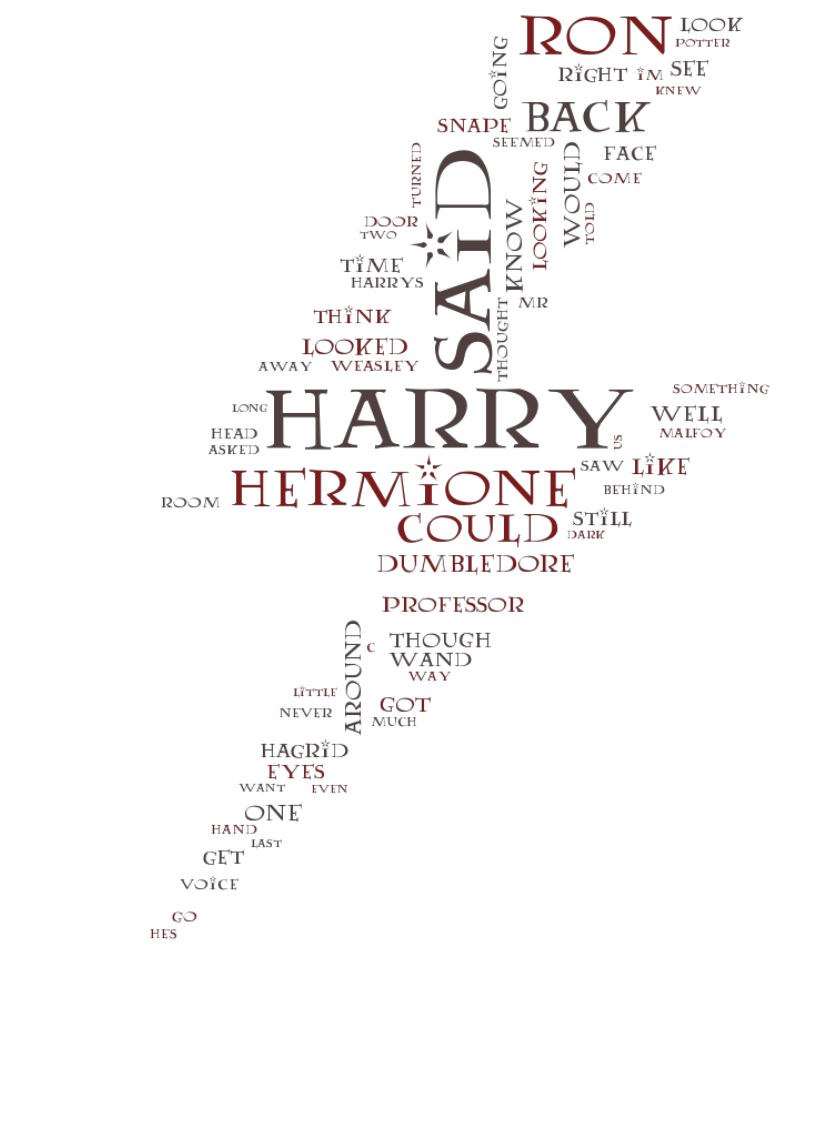

In [6]:
# Create Color Maps
# Converted HTML/HEX colors to RGB using: https://htmlcolorcodes.com/
colorsList = ['#503F3F', '#801919'] #Mauraders Map Colors
ColorMap = matplotlib.colors.ListedColormap(colorsList)

# Create and generate a word cloud image:
wordcloud = WordCloud(mask=mask, margin=10, font_path='C://Users/cluel/Documents/GitHub/Harry-Potter-Text-Mining/Font/LUMOS.ttf', min_font_size=12, max_words=500, 
                      random_state=1, colormap=ColorMap, background_color=None, mode='RGBA').generate_from_frequencies(wordcount)

# Display the generated image:
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save image to file
wordcloud.to_file("C://Users/cluel/Documents/GitHub/Harry-Potter-Text-Mining/Images/HP_WordCloud.png")

### Creating the Final WordCloud Image

In [7]:
# Bringing in background parchment and cropping
layer1 = Image.open("C://Users/cluel/Documents/GitHub/Harry-Potter-Text-Mining/Images/Background.jpg")
layer1 = layer1.crop((100,0,1216,1100))

# Bringing in WordCloud and cropping
layer2 = Image.open("C://Users/cluel/Documents/GitHub/Harry-Potter-Text-Mining/Images/HP_WordCloud.png")
layer2 = layer2.crop((0,0,704,870))

# Transposing parchment to portrait, resizing to match wordcloud, and converting type
layer1 = layer1.transpose(Image.ROTATE_90)
layer1 = layer1.resize((1004,870))
layer1 = layer1.convert('RGBA')

# Adding footsteps to parchment
shoes = Image.open("C://Users/cluel/Documents/GitHub/Harry-Potter-Text-Mining/Images/Footsteps.png")
shoes = shoes.convert('RGBA')
shoes2 = shoes.transpose(Image.FLIP_LEFT_RIGHT)
shoes2 = shoes2.transpose(Image.ROTATE_270)
shoes3 = shoes.crop((0,0,184,177))
shoes3 = shoes3.transpose(Image.ROTATE_90)
shoes3 = shoes3.rotate(-45)
shoes4 = shoes.transpose(Image.FLIP_LEFT_RIGHT)
shoes4 = shoes4.transpose(Image.ROTATE_270)
shoes4 = shoes4.crop((0, 40,177,300))
shoes5 = shoes4.crop((40,100,100,300))
shoes5 = shoes5.rotate(-45)
shoes6 = shoes5

# Adding Maurader's Map Castle and logo
Maurader = Image.open("C://Users/cluel/Documents/GitHub/Harry-Potter-Text-Mining/Images/Mauraders_Map.png")
Maurader = Maurader.convert('RGBA')
Maurader = Maurader.resize((int(355*.92),int(405*.92)))
MauraderLogo = Image.open("C://Users/cluel/Documents/GitHub/Harry-Potter-Text-Mining/Images/Maurader_Logo.png")
MauraderLogo = MauraderLogo.resize((int(688*.87),int(340*.87)))

# Compiling into one final image
final2 = Image.new("RGBA", layer1.size) # Creates new image
final2.paste(layer1, (0,0), layer1)
final2.paste(layer2, (300, 15), layer2)
final2.paste(shoes, (710, 700), shoes)
final2.paste(shoes2, (390, 0), shoes2)
final2.paste(shoes3, (260, 280), shoes3)
final2.paste(shoes4, (237, 460), shoes4)
final2.paste(shoes5, (175, 640), shoes5)
final2.paste(shoes6, (115, 650), shoes6)
final2.paste(shoes6, (55, 660), shoes6)
final2.paste(shoes6, (-5, 670), shoes6)
final2.paste(MauraderLogo, (-175, -10), MauraderLogo)
final2.paste(Maurader, (-30, 300), Maurader)
final2.show()

# Saving image
final2.save('C://Users/cluel/Documents/GitHub/Harry-Potter-Text-Mining/Output/HP_WordCloud_FINAL.png')

Which characters were mentioned most?

In [8]:
characters = ['harry', 'ron', 'hermione', 'sirius', 'luna', 'fred', 'george', 'cedric',
              'percy','voldemort', 'tom', 'peter', 'dumbledore', 'lupin', 'snape', 'trelawney', 'malfoy', 'hagrid',
              'crabbe', 'goyle', 'lockhart', 'mcgonagall','cho', 'ginny','dobby','moody','neville', 'lavender', 'colin',
             'dudley', 'vernon', 'petunia', 'lily', 'james','hooch', 'dean', 'seamus', 'viktor', 'fleur', 'charlie',
             'lockhart', 'narcissa', 'bellatrix', 'lucius', 'draco', 'pomfrey', 'quirrell', 'sprout', 'myrtle', 'umbridge',
             'molly', 'arthur', 'oliver']
CharDictionary = {x:wordcount[x] for x in characters}

Counts = collections.Counter(CharDictionary)

for word, count in Counts.most_common(15):
    print(word, ": ", count)

harry :  15081
ron :  5283
hermione :  4491
dumbledore :  2633
hagrid :  1582
snape :  1374
malfoy :  1089
voldemort :  900
sirius :  875
fred :  815
lupin :  669
george :  663
ginny :  660
mcgonagall :  626
neville :  602


Which spell-related words were mentioned most?

In [9]:
spells = ['alohomora', 'stupefy','avada','kedavra','riddikulus', 'obliviate', 'sectumsempra', 'lumos', 'expelliarmus',
         'wingardium', 'leviosa', 'accio', 'expecto', 'patronum', 'imperio', 'aguamenti', 'confundo', 'engorgio',
         'revelio', 'muffliato', 'reparo', 'petrificus', 'totalus', 'protego', 'reducio', 'scourgify']
SpellDictionary = {x:wordcount[x] for x in spells}

Counts = collections.Counter(SpellDictionary)

for word, count in Counts.most_common(10):
    print(word, ": ", count)

expecto :  40
patronum :  32
accio :  27
avada :  19
expelliarmus :  16
kedavra :  15
lumos :  14
stupefy :  12
riddikulus :  12
muffliato :  11
